In [2]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

noint()

Welcome to JupyROOT 6.12/06


In [3]:
f = r.TFile("./gm2nearline_hists_run23119_00000.root")
f.ls()

TFile**		./gm2nearline_hists_run23119_00000.root	
 TFile*		./gm2nearline_hists_run23119_00000.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder


Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available


In [4]:
t = f.Get("ibmsAnalyzer").Get("t_ibms")
t.Print()

******************************************************************************
*Tree    :t_ibms    : IBMS Detector Data                                     *
*Entries :      159 : Total =        30233489 bytes  File  Size =   12765027 *
*        :          : Tree compression factor =   2.37                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries :      159 : Total  Size=       1200 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   6.84     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries :      159 : Total  Size=       1215 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   6.87     *
*...................................................

In [94]:
arrs = []
alltrace = []

for i, e in enumerate(t):
    #if i > 10:
    #    break
    print(i, e.trace)
    #print((([x for x in e.trace][:1023])))
    #plt.hist((([x for x in e.trace][:1023])))
    
    arr = [x for x in e.trace]
    arr2 = np.reshape(arr,(80,1024))
    
    for x in e.trace:
        alltrace.append(x)
    
    arrs.append(arr2)

0 <UShort_t buffer, size 81920>
1 <UShort_t buffer, size 81920>
2 <UShort_t buffer, size 81920>
3 <UShort_t buffer, size 81920>
4 <UShort_t buffer, size 81920>
5 <UShort_t buffer, size 81920>
6 <UShort_t buffer, size 81920>
7 <UShort_t buffer, size 81920>
8 <UShort_t buffer, size 81920>
9 <UShort_t buffer, size 81920>
10 <UShort_t buffer, size 81920>
11 <UShort_t buffer, size 81920>
12 <UShort_t buffer, size 81920>
13 <UShort_t buffer, size 81920>
14 <UShort_t buffer, size 81920>
15 <UShort_t buffer, size 81920>
16 <UShort_t buffer, size 81920>
17 <UShort_t buffer, size 81920>
18 <UShort_t buffer, size 81920>
19 <UShort_t buffer, size 81920>
20 <UShort_t buffer, size 81920>
21 <UShort_t buffer, size 81920>
22 <UShort_t buffer, size 81920>
23 <UShort_t buffer, size 81920>
24 <UShort_t buffer, size 81920>
25 <UShort_t buffer, size 81920>
26 <UShort_t buffer, size 81920>
27 <UShort_t buffer, size 81920>
28 <UShort_t buffer, size 81920>
29 <UShort_t buffer, size 81920>
30 <UShort_t buffer,

In [95]:
arrfull = arrs[0]
for i in range(1,len(arrs)):
    for j, arri in enumerate(arrfull):
        arri = np.append(arri, arrs[i][j])

In [96]:
alltrace[:10]

[64624, 61591, 32767, 0, 38675, 59637, 360, 0, 38675, 59637]

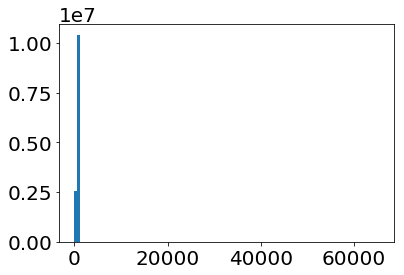

In [97]:
plt.hist(alltrace,bins=100)
plt.show()

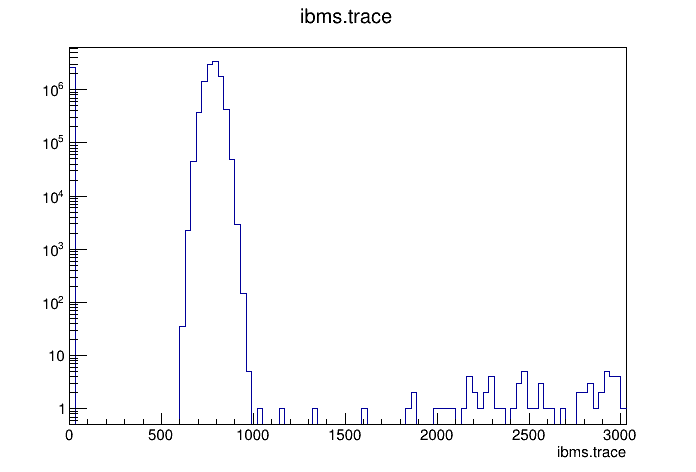

In [88]:
c = r.TCanvas()
t.Draw("ibms.trace")
c.SetLogy()
c.Draw()

In [23]:
print([x*16 for x in range(10)])

[0, 16, 32, 48, 64, 80, 96, 112, 128, 144]


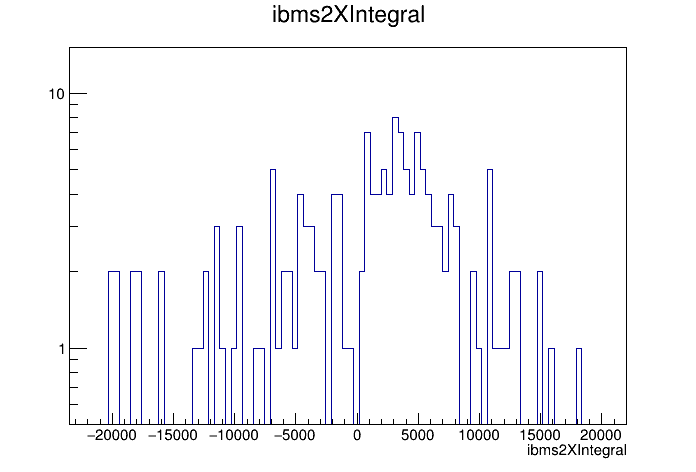

In [26]:
c = r.TCanvas()
t.Draw("ibms2XIntegral")
c.SetLogy()
c.Draw()